In [ ]:
#Importing all the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import eli5

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
#from pdpbox import pdp, 

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
RANDOM_SEED = 42

In [ ]:
import xgboost

In [ ]:
#Loading training and test data
train_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/test.csv')

In [ ]:
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X,y, random_state = 1)

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
model=XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_predict = model.predict(x_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

0.5136032390476699

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    134845
           1       0.97      0.03      0.05     15155

    accuracy                           0.90    150000
   macro avg       0.93      0.51      0.50    150000
weighted avg       0.91      0.90      0.86    150000



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_train,model.predict_proba(x_train)[:,1])

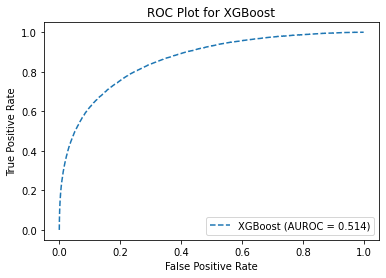

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'XGBoost (AUROC = %0.3f)' %train_auc)
plt.title('ROC Plot for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
val_predict =model.predict(x_val)

In [ ]:
val_score = roc_auc_score(y_val,val_predict)

In [ ]:
val_score

0.5081157254309983

In [ ]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     45057
           1       0.92      0.02      0.03      4943

    accuracy                           0.90     50000
   macro avg       0.91      0.51      0.49     50000
weighted avg       0.90      0.90      0.86     50000



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,model.predict_proba(x_val)[:,1])

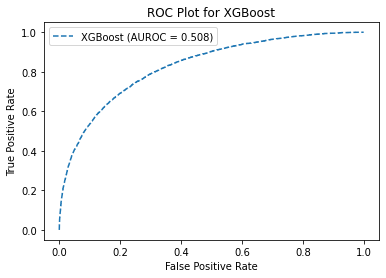

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'XGBoost (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
X_over, y_over = undersample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_over.shape

(40196, 200)

In [ ]:
y_over.shape

(40196,)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_over,y_over, random_state = 1)

In [ ]:
#pip install catboost

In [ ]:
model=XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_predict = model.predict(x_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

0.7950653337299715

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     15045
           1       0.82      0.76      0.79     15102

    accuracy                           0.80     30147
   macro avg       0.80      0.80      0.79     30147
weighted avg       0.80      0.80      0.79     30147



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_train,model.predict_proba(x_train)[:,1])

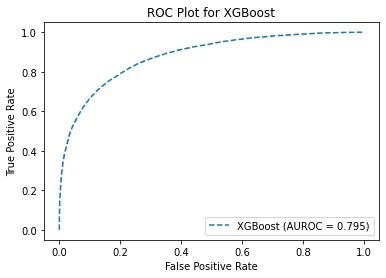

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'XGBoost (AUROC = %0.3f)' %train_auc)
plt.title('ROC Plot for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
val_predict =model.predict(x_val)

In [ ]:
val_score = roc_auc_score(y_val,val_predict)

In [ ]:
val_score

0.7524405433707742

In [ ]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      5053
           1       0.77      0.72      0.74      4996

    accuracy                           0.75     10049
   macro avg       0.75      0.75      0.75     10049
weighted avg       0.75      0.75      0.75     10049



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,model.predict_proba(x_val)[:,1])

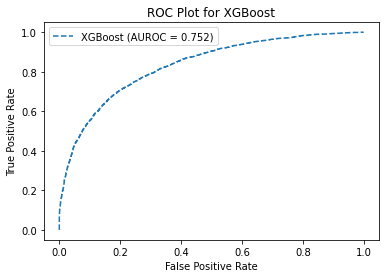

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'XGBoost (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
X_sm, y_sm = sm.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_sm.shape

(359804, 200)

In [ ]:
y_sm.shape

(359804,)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_sm,y_sm, random_state = 1)

In [ ]:
model=XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_predict = model.predict(x_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

0.8426245107436858

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84    134970
           1       0.85      0.83      0.84    134883

    accuracy                           0.84    269853
   macro avg       0.84      0.84      0.84    269853
weighted avg       0.84      0.84      0.84    269853



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_train,model.predict_proba(x_train)[:,1])

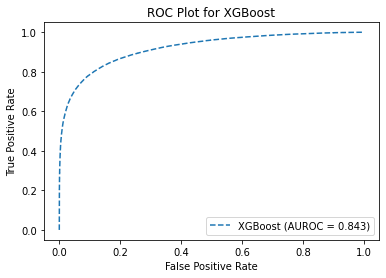

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'XGBoost (AUROC = %0.3f)' %train_auc)
plt.title('ROC Plot for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:

val_predict =model.predict(x_val)

In [ ]:
val_score = roc_auc_score(y_val,val_predict)

In [ ]:
val_score

0.8332327546967038

In [ ]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     44932
           1       0.84      0.82      0.83     45019

    accuracy                           0.83     89951
   macro avg       0.83      0.83      0.83     89951
weighted avg       0.83      0.83      0.83     89951



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,model.predict_proba(x_val)[:,1])

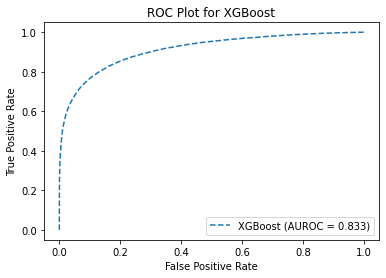

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'XGBoost (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('XGB.pkl', 'wb'))